# Data Cleaning

In [ ]:
#### WARNING: NO TEST TRAIN SPLIT INCLUDED

## This is taken from an online notebook so needs to be cited

` Data cleaning is a time consuming and unenjoyable task, yet it's a very important one. Keep in mind, "garbage in, garbage out".`

#### Feeding dirty data into a model will give us results that are meaningless.

### Objective:

1. Getting the data 
2. Cleaning the data 
3. Organizing the data - organize the cleaned data into a way that is easy to input into other algorithms

### Output :
#### cleaned and organized data in two standard text formats:
#### Some samples of the data for the purposes of manual coding

## Problem Statement

Sentiment Analysis: Analyzing the sentiment of posts helps us understand the emotional tone expressed in the text. This could be particularly useful in identifying posts that express treatments and treatment outcomes associated with mental health issues.

[Link to Mental Disorders Identification Reddit NLP dataset](https://www.kaggle.com/datasets/kamaruladha/mental-disorders-identification-reddit-nlp)

# CODE

In [54]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot  as plt

In [33]:
df1=pd.read_csv('data/mental_disorders_reddit.csv')

# EDA

In [26]:
print(df1.shape)

(571474, 6)


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701787 entries, 0 to 701786
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        701741 non-null  object
 1   selftext     668096 non-null  object
 2   created_utc  701787 non-null  int64 
 3   over_18      701787 non-null  bool  
 4   subreddit    701787 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 22.1+ MB


In [36]:
df1.dtypes

title          object
selftext       object
created_utc     int64
over_18          bool
subreddit      object
dtype: object

In [37]:
df1.isnull().any()

title           True
selftext        True
created_utc    False
over_18        False
subreddit      False
dtype: bool

In [38]:
df1.isnull().sum()

title             46
selftext       33691
created_utc        0
over_18            0
subreddit          0
dtype: int64

# Data Cleaning

In [39]:
df1=df1.dropna(how='any')

In [40]:
df1['subreddit'].value_counts()

subreddit
BPD              233119
Anxiety          167032
depression       156708
bipolar           46666
mentalillness     44249
schizophrenia     20280
Name: count, dtype: int64

In [41]:
# Dropping the data points with null values 
df1 = df1.dropna(how = 'any', axis = 0)
# lowercasing the column names so it will be easier for access ^^
df1.columns = df1.columns.str.lower()


In [42]:
# Step 1: Changing to Lower Case
df1['selftext'] = df1['selftext'].str.lower()

# Step 2: Replacing the Repeating Pattern of '&#039;'
df1['selftext'] = df1['selftext'].str.replace("&#039;", "")

# Step 3: Removing All Special Characters
df1['selftext'] = df1['selftext'].str.replace(r'[^\w\d\s]', '')

# Step 4: Removing Leading and Trailing Whitespaces
df1['selftext'] = df1['selftext'].str.strip()

# Step 5: Replacing Multiple Spaces with Single Space
df1['selftext'] = df1['selftext'].str.replace(r'\s+', ' ')

# Display cleaned data
print(df1['selftext'])


0         does anyone else think the most important part...
1         hello fellow friends 😄\n\ni'm on the bpd spect...
2         my [f20] bf [m20] told me today (after i said ...
3         okay, i’m about to open up about many things i...
4                                                 [removed]
                                ...                        
701779    i can't afford a real session and it's 11 pm. ...
701781    hello. \n         i'm taking steps to get rid ...
701782    someone (a war veteran) i know is mentally ill...
701783                                                  ama
701786    so i have a lot of random impluses. crazy shit...
Name: selftext, Length: 668054, dtype: object


# 

In [43]:
df1.columns

Index(['title', 'selftext', 'created_utc', 'over_18', 'subreddit'], dtype='object')

In [44]:
# Assuming 'selftext' is one of the columns you expect in df1
# You should check the actual columns in your DataFrame
# Make sure to load your DataFrame properly before running these operations

# Check if 'selftext' is in the columns
if 'selftext' in df1.columns:
    # Drop rows where 'selftext' is '[removed]' or '\[removed\]'
    df1.drop(df1[(df1['selftext'] =='\\[removed\\]')].index, inplace=True)
    df1.drop(df1[(df1['selftext'] =='[removed]')].index, inplace=True)

    df1.drop(df1[(df1['selftext'] =='\\[deleted\\]')].index, inplace=True)
    df1.drop(df1[(df1['selftext'] =='[deleted]')].index, inplace=True)


    # Drop rows with missing values
    df1.dropna(inplace=True)


    # Randomly sample 2 rows
    print(df1.sample(2))
else:
    print("'selftext' column not found in DataFrame")


                                          title  \
301726  Im starting medication and I’m scared 😅   
591678                   Propanolol for anxiety   

                                                 selftext  created_utc  \
301726  i[20f] saw my nurse practitioner and she refer...   1649502766   
591678  my psychiatrist recommended propanolol for my ...   1632351035   

        over_18   subreddit  
301726    False  depression  
591678    False     Anxiety  


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571474 entries, 0 to 701786
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        571474 non-null  object
 1   selftext     571474 non-null  object
 2   created_utc  571474 non-null  int64 
 3   over_18      571474 non-null  bool  
 4   subreddit    571474 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 22.3+ MB


In [46]:
def utctodatetime(utc):
    return datetime.fromtimestamp(utc)

In [47]:
df1['date_created'] = pd.to_datetime(df1['created_utc'], unit='s')

In [35]:
# df1['text_total'] = df1['Sentence'].apply(lambda x: len(x.split()))

# def count_total_words(text):
#     char = 0
#     for word in text.split():
#         char += len(word)
#     return char

# df1['text_chars'] = df1["Sentence"].apply(count_total_words)

In [36]:
# df1['text_chars']

In [48]:
df1.head()

,title,selftext,created_utc,over_18,subreddit,date_created
0,Life is so pointless without others,does anyone else think the most important part...,1650356960,False,BPD,2022-04-19 08:29:20
1,Cold rage?,hello fellow friends 😄\n\ni'm on the bpd spect...,1650356660,False,BPD,2022-04-19 08:24:20
2,I don’t know who I am,my [f20] bf [m20] told me today (after i said ...,1650355379,False,BPD,2022-04-19 08:02:59
3,HELP! Opinions! Advice!,"okay, i’m about to open up about many things i...",1650353430,False,BPD,2022-04-19 07:30:30
5,My ex got diagnosed with BPD,"without going into detail, this diagnosis expl...",1650350635,False,BPD,2022-04-19 06:43:55


In [18]:
### Making a new data frame to focus on borderline personality

df_bpd = df1[df1['subreddit'] == 'BPD']

In [49]:
## Some exploratory data analysis to see how often relevant posts appear. It seems that on average one of these posts are relevant.

df_bpd.sample(30)

,title,selftext,created_utc,over_18,subreddit,date_created
235819,Worried About Getting a Pet?,i'm planning on buying a hamster but i'm alrea...,1431822842,False,BPD,2015-05-17 00:34:02
135230,Relationship Insecurity,i feel like i’m ruining a potentially great re...,1605088765,False,BPD,2020-11-11 09:59:25
44366,does art trigger anyone else?,this is a complicated experience but one i hav...,1668484238,False,BPD,2022-11-15 03:50:38
112470,Anyone else been called (affectionatly) a waif...,today i walked in my parents garden and my mum...,1608485964,False,BPD,2020-12-20 17:39:24
41513,Losing friends,i’m in highschool and i have a very hard time ...,1666844710,False,BPD,2022-10-27 04:25:10
94129,Animals &amp; pets,someone told me once that people with borderli...,1631545442,False,BPD,2021-09-13 15:04:02
174216,I Feel Like I’m Going To Lose My Fight With Je...,i just need to vent because i feel awful. let ...,1564109637,False,BPD,2019-07-26 02:53:57
63793,My girlfriend is going through something,so she got kicked out by my dad... she’s said ...,1624079264,False,BPD,2021-06-19 05:07:44
60584,Struggling in relationships,"tw tw tw abuse, ed, etc\n\nhaving bpd is one t...",1621823105,False,BPD,2021-05-24 02:25:05
168235,The world doesn’t feel real.,i need to get this off my chest and i’m hoping...,1555227343,False,BPD,2019-04-14 07:35:43


From doing some samples, roughly 1 in 30 posts discuss medication or therapy.

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 4.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 5.000e+00, 8.000e+00, 2.000e+00,
        2.000e+00, 4.000e+00, 1.000e+01, 4.000e+00, 2.000e+00, 1.000e+00,
        4.000e+00, 9.000e+00, 4.000e+00, 2.000e+00, 1.200e+01, 1.700e+01,
        1.400e+01, 9.000e+00, 1.600e+01, 7.000e+00, 1.000e+01, 1.300e+01,
        1.600e+01, 9.000e+00, 1.700e+01, 3.200e+01, 2.500e+01, 1.100e+01,
        2.500e+01, 2.100e+01, 1.500e+01, 1.800e+01, 2.800e+01, 3.100e+01,
        2.600e+01, 1.700e+01, 2.600e+01, 1.500e+01, 2.000e+01, 1.900e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

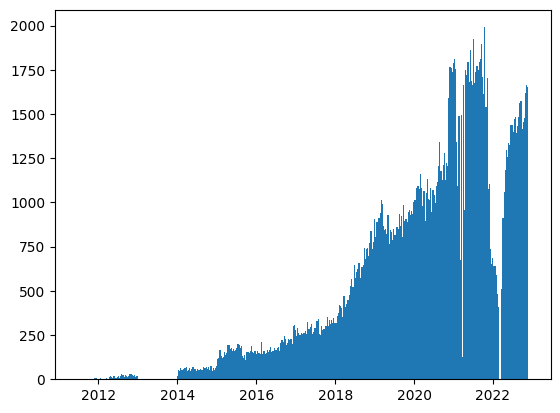

In [50]:
## Making some histograms, because histograms are interesting

plt.hist(df_bpd.date_created,bins=400)



In [106]:
start_date = '2014-01-01'
end_date = '2022-01-01'
filtered_df = df_bpd[(df_bpd['date_created'] >= start_date) & (df_bpd['date_created'] <= end_date)]

(array([  32.,   37.,   34.,   34.,   48.,   33.,   36.,   33.,   43.,
          37.,   48.,   44.,   39.,   37.,   29.,   43.,   40.,   31.,
          44.,   31.,   47.,   48.,   35.,   40.,   33.,   33.,   42.,
          40.,   32.,   29.,   43.,   42.,   34.,   43.,   53.,   41.,
          40.,   48.,   42.,   42.,   48.,   39.,   32.,   43.,   53.,
          30.,   38.,   38.,   34.,   39.,   39.,   38.,   79.,   77.,
          77.,   87.,  117.,   94.,   85.,   85.,   85.,   88.,  104.,
         105.,   93.,  101.,  125.,  133.,  121.,  117.,  124.,  114.,
         123.,  104.,  112.,  103.,  119.,  111.,  119.,  119.,  146.,
         122.,  120.,  135.,  122.,  104.,   70.,   84.,   97.,   82.,
          74.,   91.,  110.,  103.,  109.,   93.,  111.,  130.,  111.,
         105.,   99.,  102.,  109.,   83.,  125.,   97.,   96.,  101.,
         101.,  103.,  136.,  121.,   93.,  110.,   98.,   93.,  108.,
          97.,  129.,   88.,  112.,  106.,  117.,  113.,  112.,  108.,
      

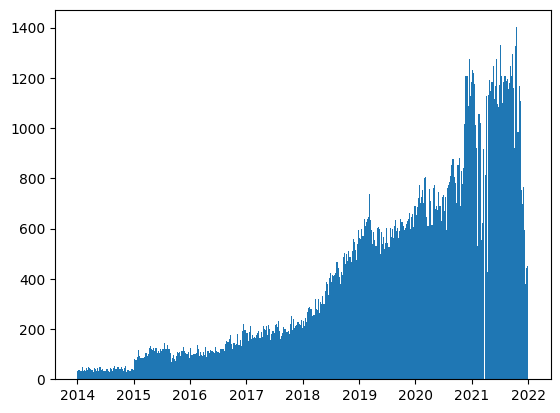

In [107]:
plt.hist(filtered_df.date_created,bins=8*52)

#### Making a sample for manual coding

In [58]:
## Since the data is fairly strange after the beginning of 2022, I think this is a good place to screening posts for manual coding

start_date2 = '2022-01-01'
end_date2 = '2022-02-01'
filtered_df2 = df_bpd[(df_bpd['date_created'] >= start_date2) & (df_bpd['date_created'] <= end_date2)]

In [61]:
## This gives a column to see if the post is about the person or someone else

filtered_df2['self'] = 1

/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_8303/3283690821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['self'] = 1


In [62]:
## This creates a column of whether the post is relevant.
## I have decided not to create a column about whether it contains a keyword, because we can seach for that and don't need to do it manually

filtered_df2['is_relevant'] = 0

/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_8303/1047943794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['is_relevant'] = 0


In [63]:
filtered_df2.to_csv('sample_posts.csv', index=False)

(array([404., 347., 398., 346., 323., 350., 258., 281., 272.,  21.,   0.,
          0.,   0., 274., 537.]),
 array([18993.01101852, 18999.00989198, 19005.00876543, 19011.00763889,
        19017.00651235, 19023.0053858 , 19029.00425926, 19035.00313272,
        19041.00200617, 19047.00087963, 19052.99975309, 19058.99862654,
        19064.9975    , 19070.99637346, 19076.99524691, 19082.99412037]),
 <BarContainer object of 15 artists>)

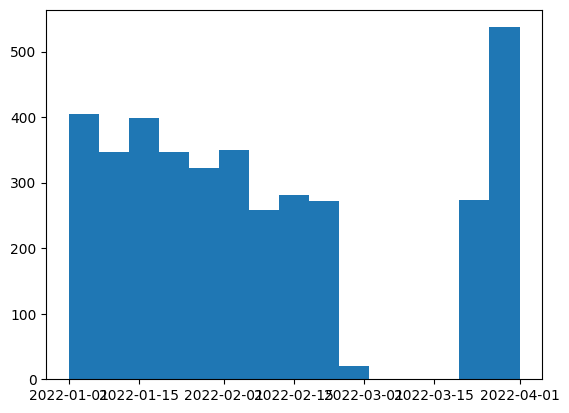

In [57]:
plt.hist(filtered_df2.date_created,bins=15)

One possibility would be to look at the frequency of posts involving certain types of medications. Do we see patterns in this data? Can we model a time series with them?